In [3]:
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.datasets import mnist

In [4]:
(X_train, G_train),(X_test, G_test) = mnist.load_data()

11501568/11490434 [==============================] - 5s 0us/step


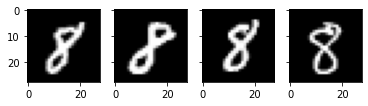

In [5]:
idx_4 = np.where(G_train == 8)

X = X_train[idx_4, :, :]
X = X[0, :, :, :]
X = X.reshape(X.shape[0], 28 * 28)

fig, axs = plt.subplots(1, 4, sharex=True, sharey=True)

for i in range(4):
    axs[i].imshow(X[i, :].reshape((28, 28)), cmap='gray')

In [6]:
dimensionalities = [784, 512, 256, 128, 64, 32]

In [31]:
class PrincipalComponentAnalysis:
    
    def __init__(self, n_components=None):
        self.n_components = n_components
        
    def set_params(self, n_components=None):
        if n_components:
            self.n_components = n_components
        
    def fit(self, data):
        if data is None:
            raise Exception('Feature data has not bee provided')

        self.mean_ = np.mean(data, axis=0)

        data = data - self.mean_
        
        self.n_samples_ = data.shape[0]
        self.n_features_ = data.shape[1]
        
        if self.n_components is None:
            self.n_components = min(self.n_samples_, self.n_features_)
        
        self.n_components_ = self.n_components
        
        cov = data.T.dot(data) / (self.n_samples_ - 1)
        
        eig_vals, eig_vecs = np.linalg.eig(cov)
        
        # sort eigenvectors based on eigenvalues
        sorted_singular_values = np.real(np.argsort(eig_vals))
        sorted_components = np.real(eig_vecs[sorted_singular_values])
        
        self.singular_values_ = eig_vals[: self.n_components]
        self.components_ = eig_vecs[:, : self.n_components]

    
        return self
    
    def fit_transform(self, data):
        if data is None:
            raise Exception('Feature data has not bee provided')
            
        self.fit(data)
        
        return np.dot(self.components_.T, data.T).T
            
    def inverse_transform(self, data):
        if data is None:
            raise Exception('Feature data has not bee provided')
            
        return  data @ self.components_.T

In [32]:
class LossyDataCompression:
    ''' Compress data in a lossy way using PCA to decide on the number of important features '''
    
    def __init__(self):
        self.pca = PrincipalComponentAnalysis()
        
    def compress(self, data, desired_components=200):        
        self.pca.set_params(n_components=desired_components)
        
        return self.pca.fit_transform(data)
    
    def decompress(self, data):
        return self.pca.inverse_transform(data)

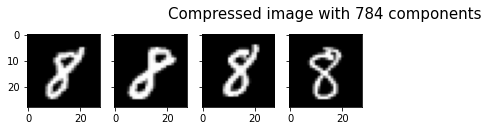

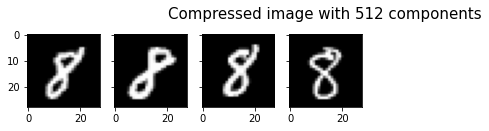

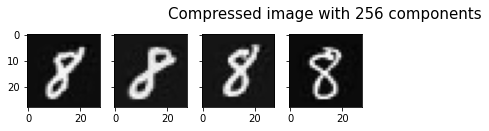

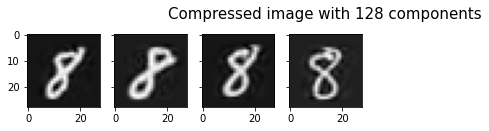

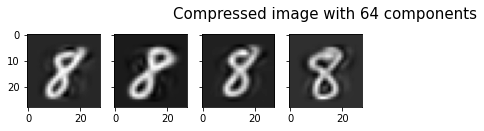

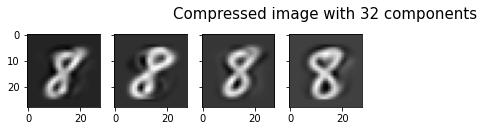

In [33]:
for dimension in dimensionalities:
    ldc = LossyDataCompression()
    
    X_compressed = ldc.compress(X, desired_components=dimension)
    X_recovered = ldc.decompress(X_compressed)
    
    fig, axs = plt.subplots(1, 4, sharex=True, sharey=True)

    for i in range(4):        
        axs[i].imshow(np.real(X_recovered[i, :]).reshape((28, 28)), cmap='gray')

        plt.title(f'Compressed image with {dimension} components', fontsize=15, pad=15)
        plt.savefig(f'image_pca_recovered_{dimension}.png')